# Enrichments

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Matplotlib settings
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['font.size'] = 13
plt.rcParams['font.family'] = 'Arial'

In [3]:
def getFrequencies(sequences, fa_count, l, withcounts=True):
    '''
    Computes the frequencies of each base at each position (normalizes to the total number of reads or unique sequences)
    sequences:      pandas series of unique sequences
    fa_count:       pandas series of readnumbers
    l:              sequence length
    withcounts:     Use either readnumbers or consider each unique sequence only once
    '''
        
    counts = {"A": [0] * l, "T": [0] * l, "G": [0] * l, "C": [0] * l, "N": [0] * l}
    
    if withcounts == False:
        fa_count = [1] * len(fa_count)
    else:
        pass
    
    for seq, c in zip(sequences, fa_count):
        for pos, base in enumerate(seq):
            counts[base][pos] += c
            
    for k in counts.keys():
        counts[k] = counts[k]/np.array([sum(fa_count)] * len(counts[k]))
    
    return counts

---

In [4]:
# Params:

dataset_init = '/home/kurfurst/Documents/datasets/MV_aurora_singlestep_initial.tsv'
dataset_select = '/home/kurfurst/Documents/datasets/MV_aurora_singlestep_10min_20uM.tsv'
ss_positions_1based = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 20, 21, 22, 23, 27, 28, 29, 33, 34, 35, 36, 37, 41]
ds_positions_1based = [11, 12, 14, 15, 16, 17, 18, 19, 24, 25, 26, 30, 31, 32, 38, 39, 40, 42, 43, 44, 45, 46, 47]

In [5]:
# Prep

df_init = pd.read_csv(dataset_init, sep='\t', names=['count', 'seq'])
df_select = pd.read_csv(dataset_select, sep='\t', names=['count', 'seq'])
ss_positions_0based = [x - 1 for x in ss_positions_1based]
seqlen = len(df_init.iloc[0]['seq'])

In [6]:
# Computing single nucleotide frequencies for the two pools

df_snfq_init = pd.DataFrame(getFrequencies(df_init['seq'], df_init['count'], seqlen, withcounts=True))
df_snfq_select = pd.DataFrame(getFrequencies(df_select['seq'], df_select['count'], seqlen, withcounts=True))

In [8]:
# Get an enrichment dataframe from frequencies

df_enrichments = df_snfq_select / df_snfq_init
del df_enrichments['N']
df_enrichments.index = [x for x in range(1, len(df_enrichments)+1)]
df_enrichments.fillna(0, inplace=True)

# Subset positions
df_enrichments_ss = df_enrichments.loc[ss_positions_1based]
df_enrichments_ds = df_enrichments.loc[ds_positions_1based]

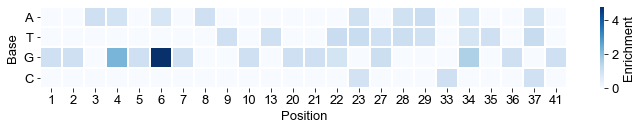

In [9]:
plt.figure(figsize=(10, 2))
sns.heatmap(df_enrichments_ss.transpose(), cmap='Blues', linewidth=1.5, linecolor='white', cbar_kws={'label': 'Enrichment'})
plt.yticks(rotation=0)
plt.xlabel('Position')
plt.ylabel('Base')
plt.tight_layout()
plt.savefig('figSI3a.png', dpi=180)

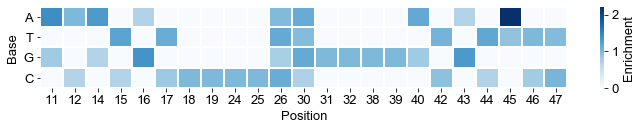

In [10]:
plt.figure(figsize=(10, 2))
sns.heatmap(df_enrichments_ds.transpose(), cmap='Blues', linewidth=1.5, linecolor='white', cbar_kws={'label': 'Enrichment'})
plt.yticks(rotation=0)
plt.xlabel('Position')
plt.ylabel('Base')
plt.tight_layout()
plt.savefig('figSI3b.png', dpi=180)